In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [89]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 
        'turbidity', 'sugars', 'degree_of_fermentation', 
        'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 
            'turbidity', 'sugars', 'degree_of_fermentation', 
            'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

df = pd.read_table("beer_ratings.txt", names = cols)

df = df[cols_new]

In [90]:
scaler = RobustScaler() 
df = pd.DataFrame(scaler.fit_transform(df), columns = cols_new)

In [91]:
X = df.iloc[:, :-1] # Independent Variables

y = df.iloc[:, -1] # Dependent Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 3)

In [92]:
rt = DecisionTreeRegressor(max_depth = 3)
model = rt.fit(X_train, y_train)
model.score(X_train, y_train)

0.49186975987422354

In [93]:
model.score(X_test, y_test)

0.24319459844517766

In [94]:
y_pred = model.predict(X_test)

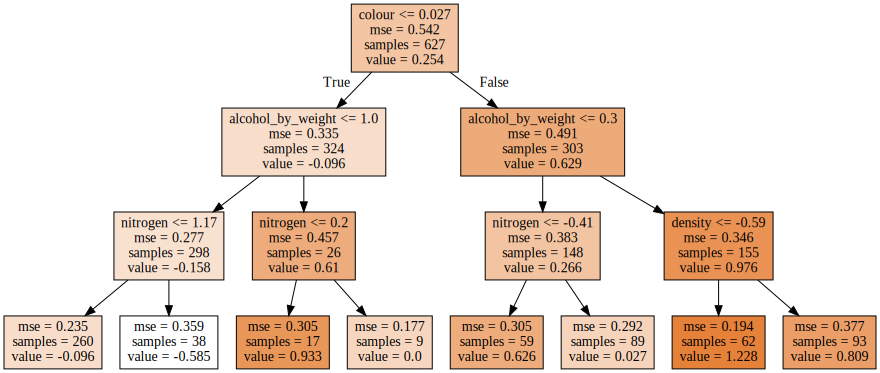

In [95]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(rt, feature_names=list(X), 
                                class_names=sorted(y.unique()), filled=True)
graphviz.Source(dot_data)

In [96]:
predictions = cross_val_predict(model, X, y, cv = 100)

In [97]:
accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.3057285151562479
